<p style="text-align:center">
    <a href="https://www.edhec.edu/en" target="_blank">
    <img src="	https://www.edhec.edu/sites/default/files/Logo.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

## Completed by: Neo Mmusi

# Computing Maximum Drawdown
In this lab, we'll develop the code to compute the maximum drawdown of a return series, and we'll start to develop our own module which will act as a toolkit that we will add to during the course.

First, let's read the return series we processed in the previous lab:

In [1]:
import pandas as pd

In [2]:
me_m = pd.read_csv("C:\\Users\\user\\Desktop\\Portfolios_Formed_on_ME_monthly_EW.csv",
                  header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [3]:
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100

<AxesSubplot:>

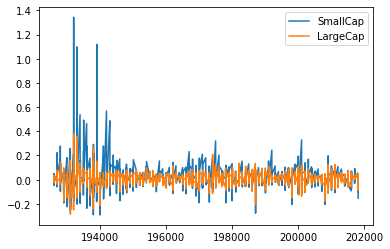

In [4]:
rets.plot.line()

In [8]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

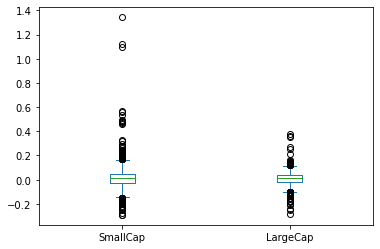

In [5]:
rets.plot.box()

<AxesSubplot:>

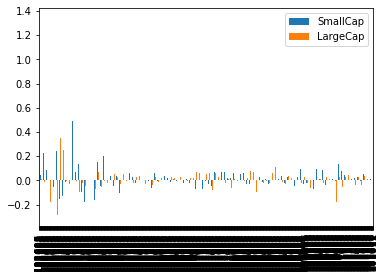

In [6]:
rets.plot.bar()

## Timeseries - forcing the index to be a datetime

We asked Pandas to `parse_dates` in `read_csv()`. Let's check if it was able to do so with the index:

In [7]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

The `dtype` is `int64` which suggests that it was not automatically converted to a date time index, so let's do that now manually. The simplest way to force it to be a timeseries is by reformatting the index data to a `datetime` type as follows:

In [9]:
rets.index = pd.to_datetime(rets.index, format="%Y%M")
rets.index

DatetimeIndex(['1926-01-01 00:07:00', '1926-01-01 00:08:00',
               '1926-01-01 00:09:00', '1926-01-01 00:10:00',
               '1926-01-01 00:11:00', '1926-01-01 00:12:00',
               '1927-01-01 00:01:00', '1927-01-01 00:02:00',
               '1927-01-01 00:03:00', '1927-01-01 00:04:00',
               ...
               '2018-01-01 00:03:00', '2018-01-01 00:04:00',
               '2018-01-01 00:05:00', '2018-01-01 00:06:00',
               '2018-01-01 00:07:00', '2018-01-01 00:08:00',
               '2018-01-01 00:09:00', '2018-01-01 00:10:00',
               '2018-01-01 00:11:00', '2018-01-01 00:12:00'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [10]:
rets.head()

,SmallCap,LargeCap
1926-01-01 00:07:00,-0.0145,0.0329
1926-01-01 00:08:00,0.0512,0.0370
1926-01-01 00:09:00,0.0093,0.0067
1926-01-01 00:10:00,-0.0484,-0.0243
1926-01-01 00:11:00,-0.0078,0.0270


In [11]:
rets.index = rets.index.to_period("M")

In [12]:
rets.head()

,SmallCap,LargeCap
1926-01,-0.0145,0.0329
1926-01,0.0512,0.0370
1926-01,0.0093,0.0067
1926-01,-0.0484,-0.0243
1926-01,-0.0078,0.0270


In [13]:
rets["1975"]

C:\Users\user\AppData\Local\Temp/ipykernel_5252/1118287903.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["1975"]


,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-01,0.0657,0.0613
1975-01,0.0989,0.0414
1975-01,0.0288,0.0531
1975-01,0.0811,0.0610
1975-01,0.0779,0.0524
1975-01,0.0218,-0.0703
1975-01,-0.0525,-0.0177
1975-01,-0.0351,-0.0468
1975-01,-0.0009,0.0620


In [14]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-01 to 2018-01
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown which is the wealth value as a percentage of the previous peak

In [18]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

In [19]:
wealth_index.head()

1926-01    1032.900000
1926-01    1071.117300
1926-01    1078.293786
1926-01    1052.091247
1926-01    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

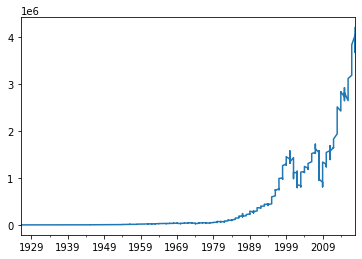

In [20]:
wealth_index.plot()

<AxesSubplot:>

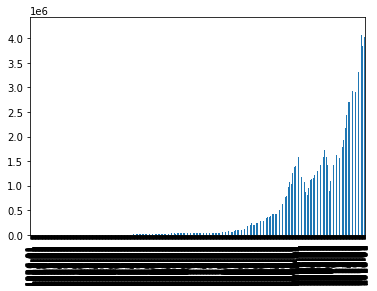

In [21]:
wealth_index.plot.bar()

In [22]:
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

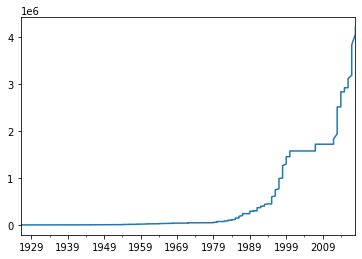

In [23]:
previous_peaks.plot()

In [24]:
drawdown = (wealth_index - previous_peaks)/previous_peaks

<AxesSubplot:>

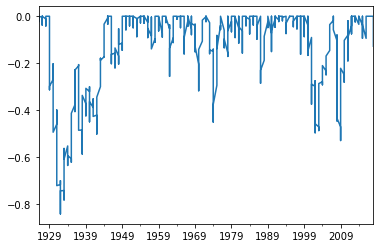

In [25]:
drawdown.plot()

<AxesSubplot:>

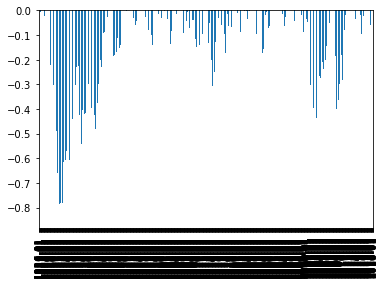

In [27]:
drawdown.plot.bar()

<AxesSubplot:>

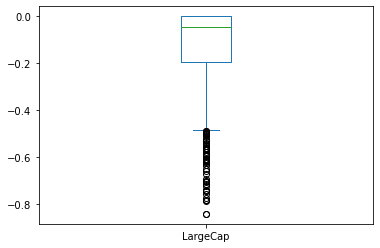

In [28]:
drawdown.plot.box()

In [30]:
drawdown.mean()

-0.12850062747161928

In [31]:
drawdown.head()

1926-01    0.0000
1926-01    0.0000
1926-01    0.0000
1926-01   -0.0243
1926-01    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [34]:
drawdown.max()

0.0

In [35]:
drawdown.min()

-0.8400375277943123

In [36]:
drawdown["1975":].min()

-0.5280945042309304

What I'm saying is give me the maximum drawdown since 1975, and you see a loss of almost 52 percent

In [39]:
drawdown["1975":].idxmin()

Period('2009-01', 'M')

Now you might be interested, well, when exactly did that happen? The way you do that is you don't want the min, you want the index of the min. Because remember, the index is the date. We want the index of the min because the index tells us when that happens. All I do is, I go in there and there's another method I can call idxmin. Idxmin says, find what the minimum is and this will return the minimum, which is what that does,.min does, return to me the index of the minimum. So I do that and you see that that index of the minimum happen in 2009-02. February 2009 was the worst point of that

In [41]:
def drawdown(return_series: pd.Series): 
    """
    Takes a time series of assest returns
    compute and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "wealth": wealth_index,
        "Peaks" : previous_peaks,
        "Drawdown": drawdowns
    })

In [42]:
drawdown(rets["LargeCap"]).head()

,wealth,Peaks,Drawdown
1926-01,1032.900000,1032.900000,0.0000
1926-01,1071.117300,1071.117300,0.0000
1926-01,1078.293786,1078.293786,0.0000
1926-01,1052.091247,1078.293786,-0.0243
1926-01,1080.497711,1080.497711,0.0000


In [46]:
drawdown(rets["LargeCap"])[["wealth","Peaks"]].head()

,wealth,Peaks
1926-01,1032.900000,1032.900000
1926-01,1071.117300,1071.117300
1926-01,1078.293786,1078.293786
1926-01,1052.091247,1078.293786
1926-01,1080.497711,1080.497711


<AxesSubplot:>

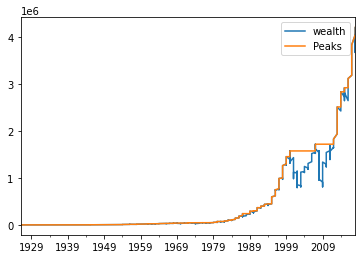

In [47]:
drawdown(rets["LargeCap"])[["wealth","Peaks"]].plot()

Let's say we wanted to do this exact same thing. So let me copy that and paste it, and let's say we wanted to do this exact same thing but we wanted to do it only over the period, let's say up to 1950. 

<AxesSubplot:>

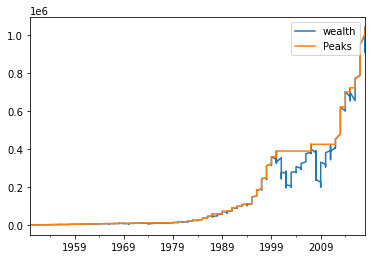

In [60]:
drawdown(rets["1950":]["LargeCap"])[["wealth","Peaks"]].plot()

<AxesSubplot:>

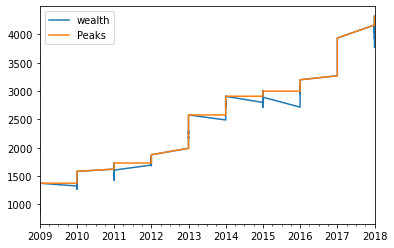

In [59]:
drawdown(rets["2009":]["LargeCap"])[["wealth","Peaks"]].plot()

In [61]:
drawdown(rets["LargeCap"]).head()

,wealth,Peaks,Drawdown
1926-01,1032.900000,1032.900000,0.0000
1926-01,1071.117300,1071.117300,0.0000
1926-01,1078.293786,1078.293786,0.0000
1926-01,1052.091247,1078.293786,-0.0243
1926-01,1080.497711,1080.497711,0.0000


In [62]:
drawdown(rets["LargeCap"]).min()

wealth       405.769102
Peaks       1032.900000
Drawdown      -0.840038
dtype: float64

In [63]:
drawdown(rets["SmallCap"]).min()

wealth      491.240323
Peaks       985.500000
Drawdown     -0.833001
dtype: float64

In [64]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-01', 'M')

In [65]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-01', 'M')

In [66]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-01', 'M')

In [67]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-01', 'M')

In [68]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].min()

-0.6312068077252386

In [69]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-01', 'M')

In [70]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].min()

-0.5280945042309303

In [71]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-01', 'M')